# Advanced Regression Assignment
## House Price Prediction
---

## Problem Statement
---
Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

Find out:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Understanding
---

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file.

The company is looking at prospective properties to buy to enter the market.

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further the model will be a good way for management to understand the pricing dynamics of a new market.

### Analysis approach

---

 - Read, understand, and clean the data
 - Data Visualization
 - Feature cleanup
 - Prepare the data for modelling (train-test split, rescaling)
 - Scale the data
 - Linear regression model
 - Ridge regression model
 - Lasso regression model
 - Model Comparison
 - Conclusion

### Read, understand, and clean the data

In [2]:
# Import required python libraries to work with CSV file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load given dataset day.csv file in dataset variable
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Get basic information about dataset
data.shape

(1460, 81)

In [373]:
# Get basic information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Get basic information about dataset
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# Dropping ID column as it will not affect the house price

data.drop("Id", axis = 1, inplace=True)
data.shape

(1460, 80)

### Handling Null values

In [10]:
# Find number of null values in each column
data.isna().sum().sort_values(ascending = False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
Fireplaces         0
Functional         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

[]

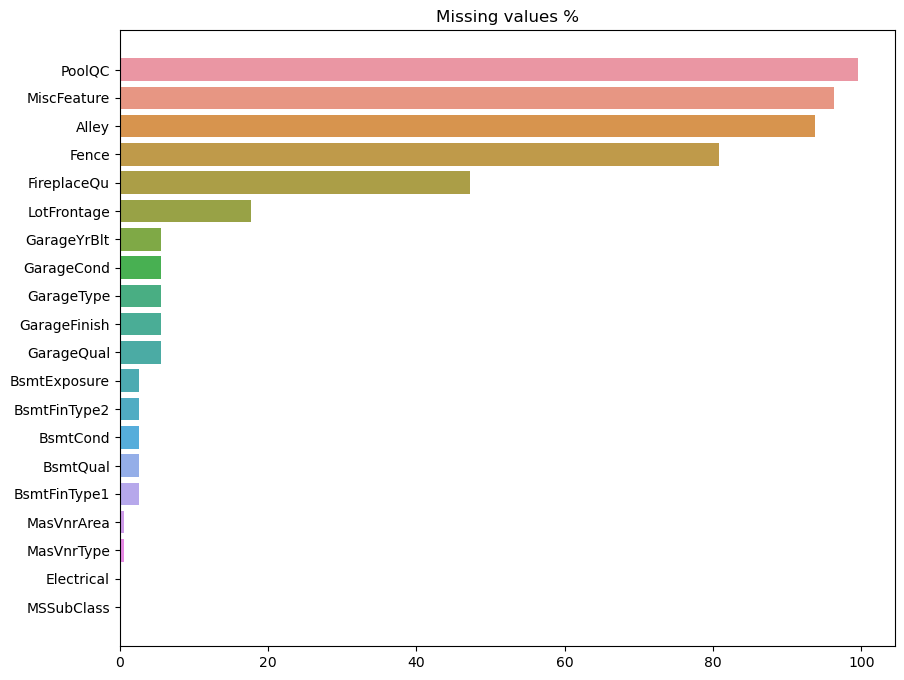

In [11]:
missing_vals_percent = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False).head(20)

plt.figure(figsize = (10, 8))
sns.barplot(missing_vals_percent[:] , missing_vals_percent[:].index)
plt.title('Missing values %')
plt.plot()

In [12]:
# Drop Top 4 features as those have a lot of null values and will not contribute significantly

cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
data.drop(cols_to_drop, axis = 1, inplace=True)
data.shape

(1460, 76)

In [13]:
dataset.isna().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

In [16]:
# As per data dictionary file provided - NA value actually have a real meaning,
# for e.g. FireplaceQu NA means 'No Fireplace', Alley NA means 'No Alley access'
# Replacing meaningful 'NA' values with 'None' value
# so that python isna() function can distinguish between real null and meaningful null

columns_with_meaningful_NA_value = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                    'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish',
                                    'GarageQual', 'GarageCond']

for col in columns_with_meaningful_NA_value:
    data[col] = data[col].fillna('None')


data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0.0)

data.shape

(1460, 76)

In [18]:
data.isna().sum().sort_values(ascending = False).head(20)

LotFrontage     259
MasVnrType        8
MasVnrArea        8
Electrical        1
KitchenAbvGr      0
FireplaceQu       0
Fireplaces        0
Functional        0
TotRmsAbvGrd      0
KitchenQual       0
MSSubClass        0
GarageType        0
HalfBath          0
FullBath          0
BsmtHalfBath      0
BsmtFullBath      0
GrLivArea         0
LowQualFinSF      0
2ndFlrSF          0
BedroomAbvGr      0
dtype: int64

In [21]:
# There are 4 Columns still with null values = ['LotFrontage', 'MasVnrArea' , 'MasVnrType', 'Electrical']

# Filling LotFrontage Continuous variables with median value
data['LotFrontage']= data['LotFrontage'].fillna(data['LotFrontage'].median())

# Filling MasVnrType with None (No Masonry veneer)
data['MasVnrType']= data['MasVnrType'].fillna('None')

# Filling MasVnrArea with 0 (No Masonry veneer - zero area)
data['MasVnrArea']= data['MasVnrArea'].fillna(0)

# Filling Electrical with mode value (SBrkr)
data['Electrical']= data['Electrical'].fillna(data['Electrical'].mode()[0])

In [22]:
data.isna().sum().sum()

0

####  There are no more null values in the data set

### Handling duplicates

In [23]:
# Find and drop duplicate values
data.drop_duplicates()
data.shape

(1460, 76)

### Derive feature Property age


In [26]:
# Add a derived feature PropertyAge since it might have an impact on the sale price

data['PropertyAge'] = data['YrSold'] - data['YearBuilt']
data.shape

(1460, 77)

### Checking for outlier data

In [28]:
numeric_columns = dataset.select_dtypes(exclude=object).columns

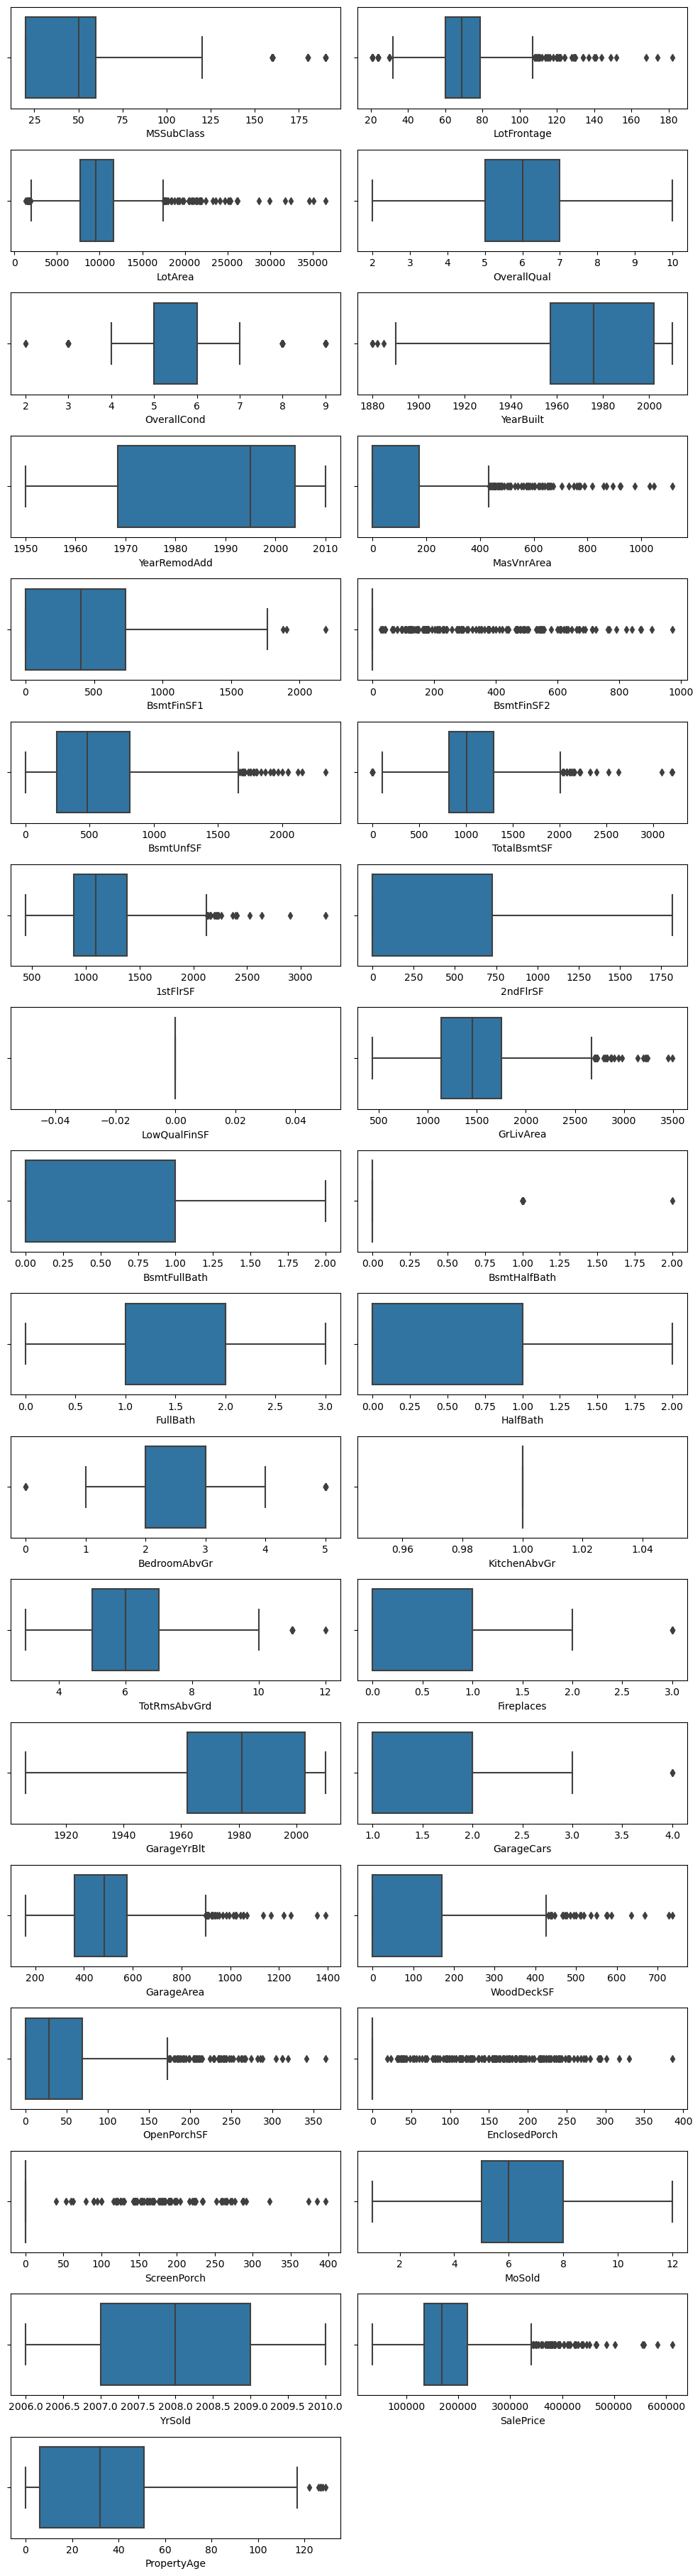

In [43]:
# Box Plot features to visualize outliers
plt.figure(figsize = (10, 40))

plotCounter = 1
for col in numeric_columns:
    plt.subplot(20, 2, plotCounter)
    sns.boxplot(data[col])
    plotCounter = plotCounter + 1

plt.tight_layout()
plt.show()

#### Observations:
 -  LotFrontage, LotArea, MasVnrArea, BsmtFinSF2 have a lot of outlier data
 - Features PoolArea, MiscVal, 3SsnPorch, ScreenPorch etc. have lot of unique data

In [32]:
# Based on above observations, we can drop few columns

data.drop(['PoolArea', 'MiscVal', '3SsnPorch'], axis = 1, inplace=True)
data.shape

(1460, 74)

In [33]:
# For using IQR method to drop outliers, we need to find all features with numeric values
# Use data type of column to find numeric features
dataset.select_dtypes(exclude=object).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice',
       'PropertyAge'],
      dtype='object')

In [34]:
numerical_columns = data.select_dtypes(exclude=object).columns

def drop_outlier_rows(data, col):
    Q1 = data[col].quantile(.05)
    Q3 = data[col].quantile(.95)
    IQR = Q3 - Q1
    lower_Range = Q1 - (1.5 * IQR)
    upper_Range = Q3 + (1.5 * IQR)
    data = data[(data[col] >= lower_Range) & (data[col] <= upper_Range)]
    return data

for col in numerical_columns:
    data = drop_outlier_rows(data, col)

data.shape

(1275, 74)

### Check the correlation between features

In [35]:
numeric_columns = data.select_dtypes(exclude=object).columns

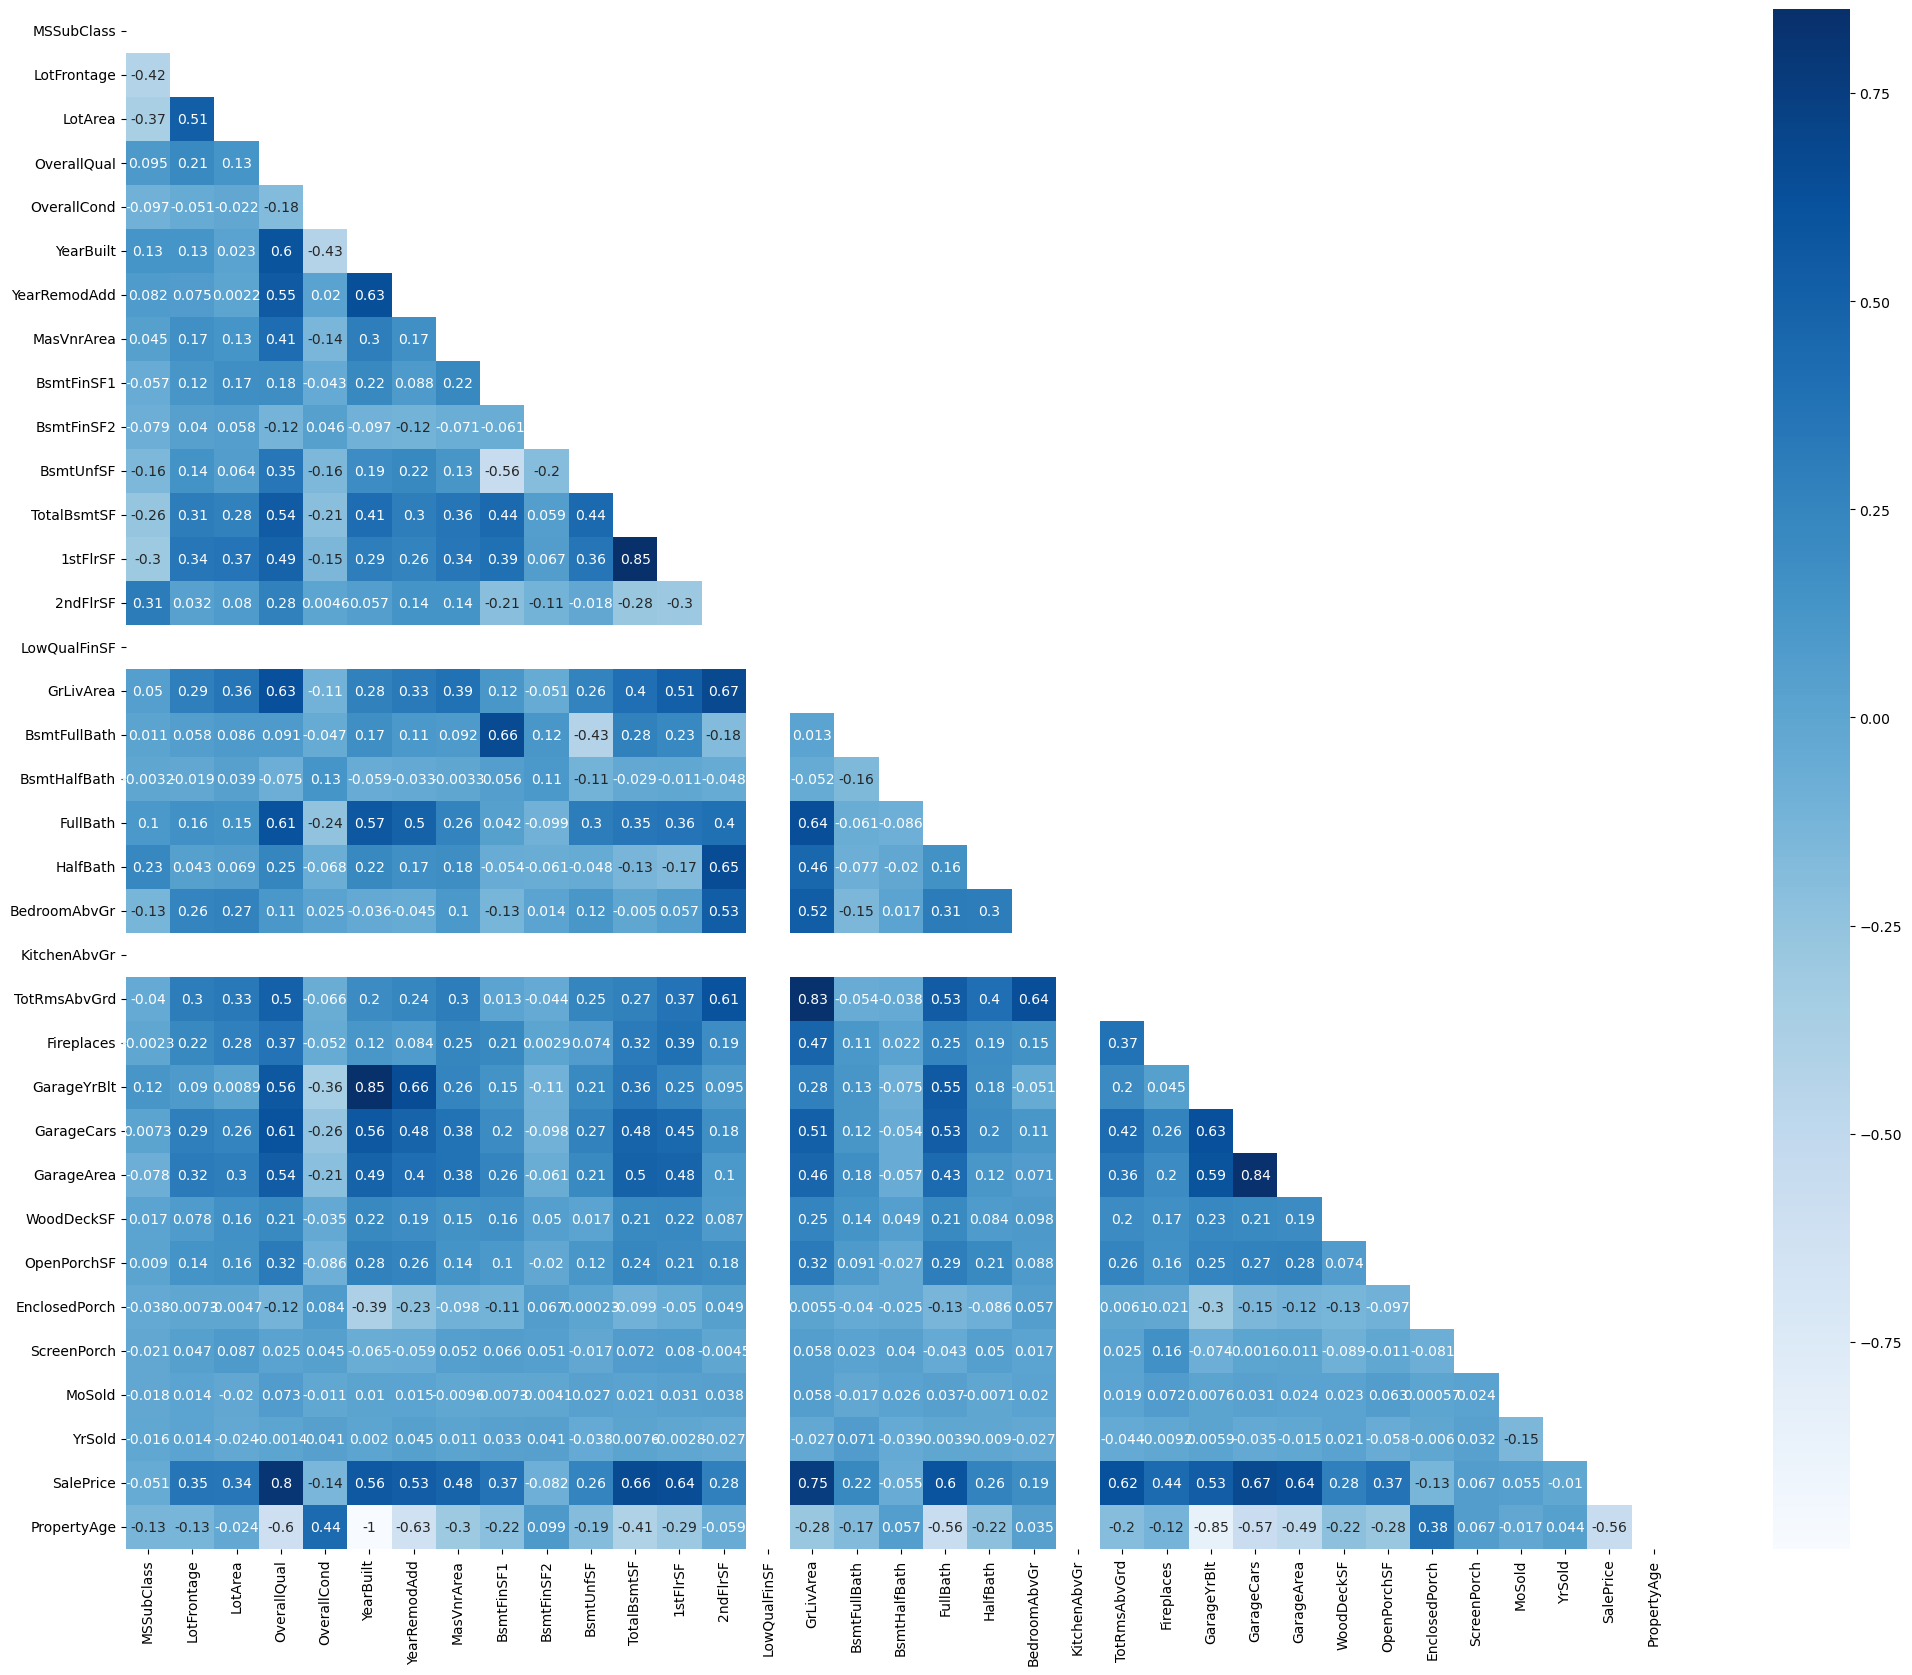

In [38]:
# plot correlation graph

plt.figure(figsize = (25, 20))

mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
sns.heatmap(data.corr(), mask = mask, cmap="Blues", annot = True)

plt.show()

#### Observations:
 - GarageYrBlt is realted to YearBlt (0.85)
 - 1stFlrSF is related to TotalBsmtSf (0.85)
 - TotRmsAbvGrd is related to GrLivArea (0.83)
 - GarageArea is related to GarageCars (0.84)
 - SalePrice is related to OverallQual, GrLivArea, GarageCars, GarageArea, TotalRmsAbvGrd, TotalBsmtSf, 1stFlrSf, FullBath

In [39]:
# Based on above observations, removing correlated columns

col_names_related = ['TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']
dataset.drop(col_names_related, axis = 1, inplace=True)
dataset.shape

(1460, 75)

### Data Visualization

In [46]:
numeric_columns = data.select_dtypes(exclude=object).columns


35

ValueError: Could not interpret value `LowQualFinSF` for parameter `x`

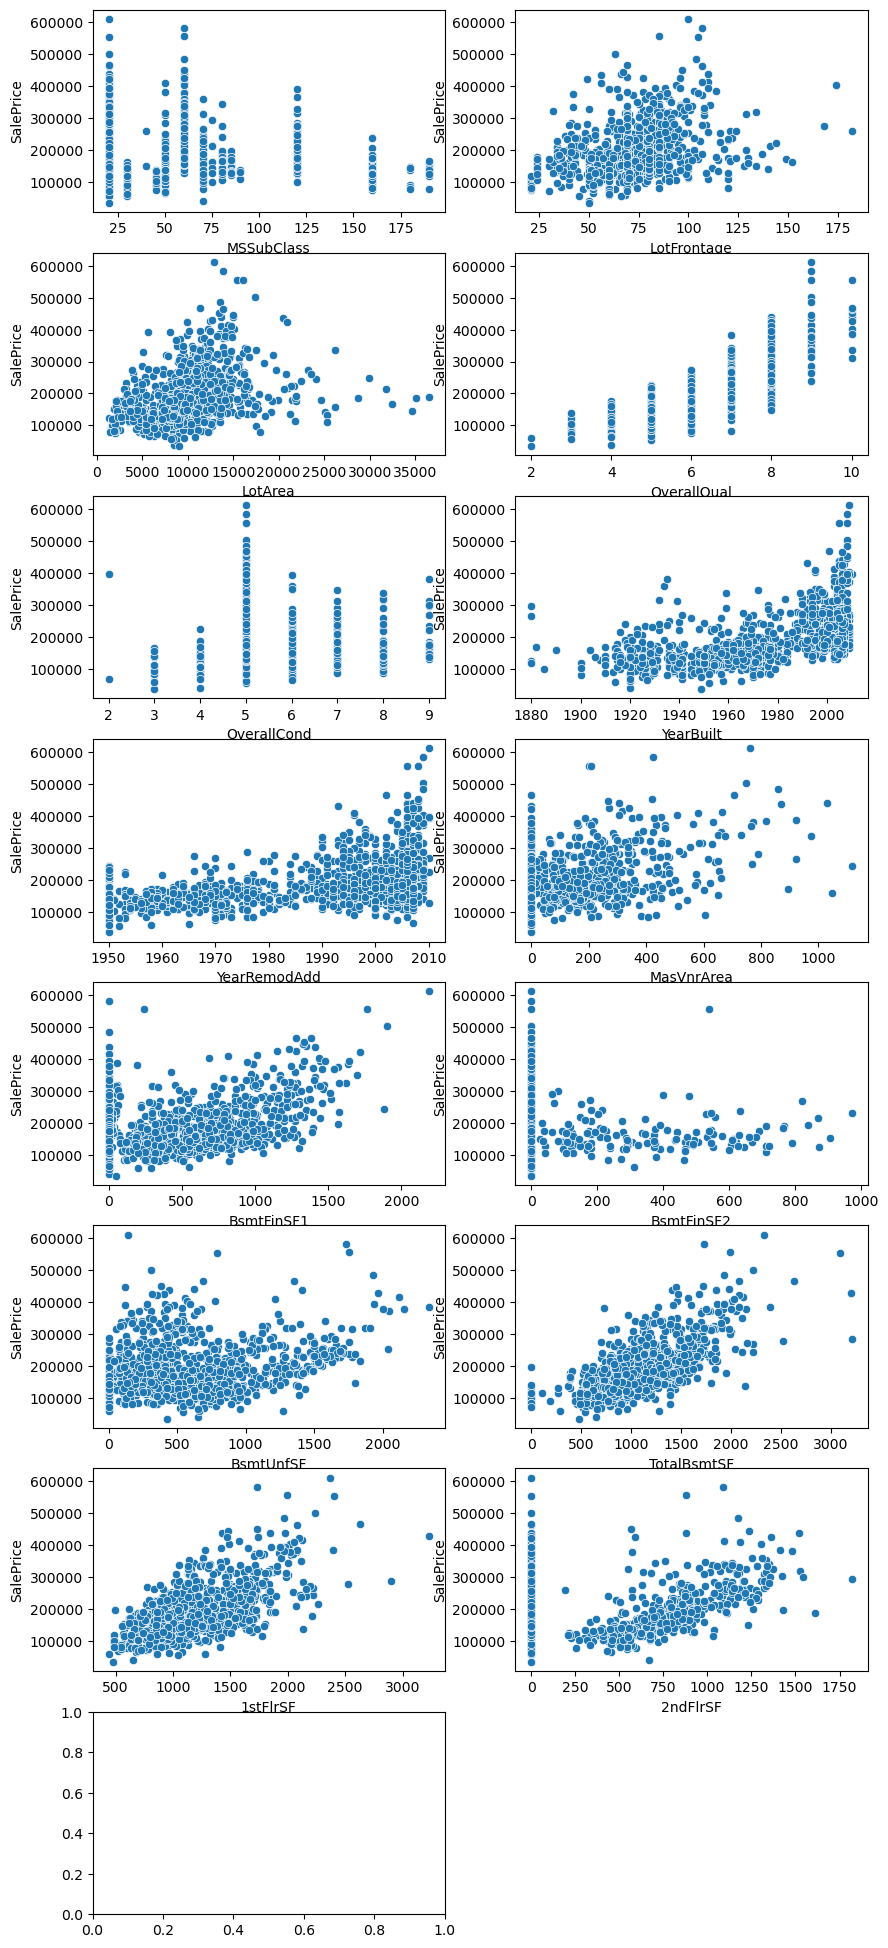

In [50]:
# Plotting Scatter plots to understand feature trend with sale price
plt.figure(figsize=(10, 50))

plotCounter = 1
for col in numeric_columns:
    plt.subplot(16, 2, plotCounter)
    sns.scatterplot(x = col, y = 'SalePrice', data = data)
    plotCounter = plotCounter + 1

plt.tight_layout()
plt.show()

In [47]:
# Based on above observations, few features can be dropped
col_names_with_all_values_same = ['LowQualFinSF', 'KitchenAbvGr']
data.drop(col_names_with_all_values_same, axis = 1, inplace=True)
data.shape

(1275, 72)

In [51]:
category_columns = dataset.select_dtypes(include=object).columns

ValueError: num must be 1 <= num <= 40, not 41

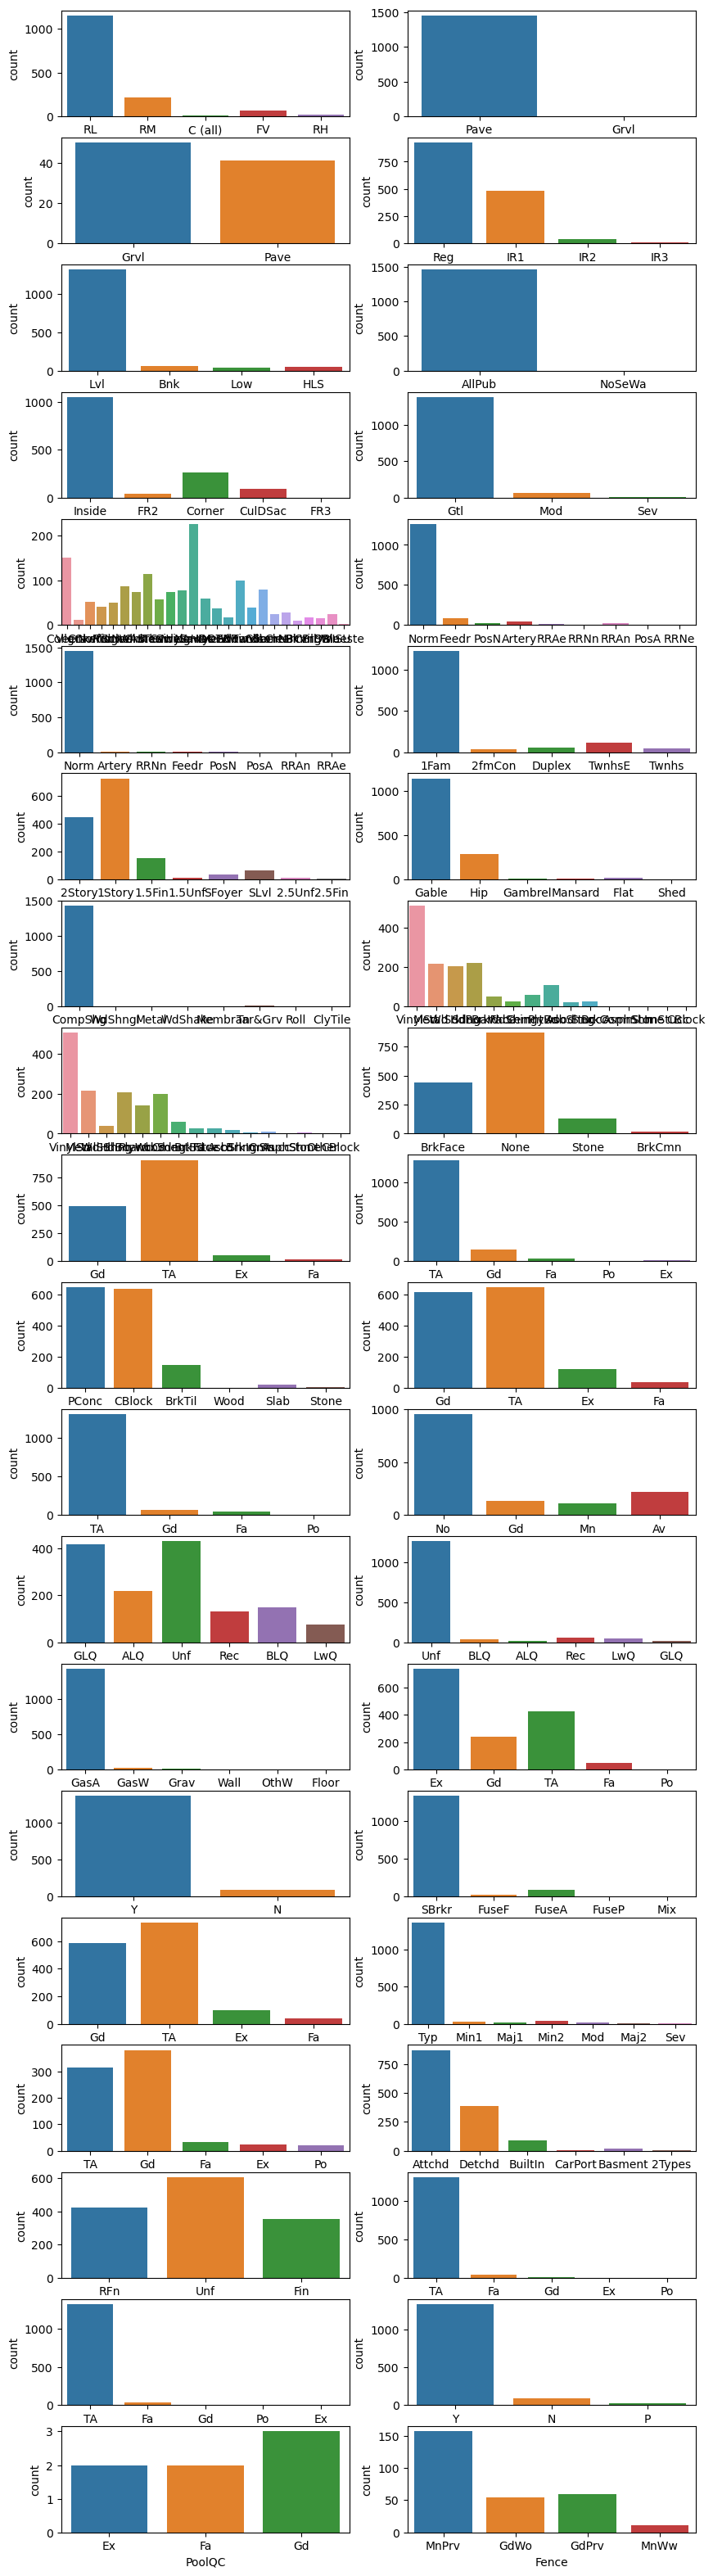

In [52]:
# Plotting histogram plots to understand feature distribution

plt.figure(figsize=(10, 40))

plotCounter = 1
for col in category_columns:
    plt.subplot(20, 2, plotCounter)
    sns.countplot(col, data = dataset)
    plotCounter = plotCounter + 1

plt.tight_layout()
plt.show()

#### Observations
 - Street, Utilities, Condition2, Heating, CentralAir, Functional, GarageQual are feature dominated by single category

In [53]:
# Based on above observations, few columns can be dropped
cols_to_drop = ['Street', 'Utilities', 'Condition2', 'Heating', 'CentralAir', 'Functional', 'GarageQual']
data.drop(cols_to_drop, axis = 1, inplace=True)
data.shape

(1275, 65)

### Prepare the data for modelling 

### Encode Variables\ Dummy variables

In [54]:
# Create Dummy variables for all categorical columns
category_columns = data.select_dtypes(include=object).columns

for col in category_columns:
    dataCol = pd.get_dummies(data[col], prefix = col, drop_first=True)
    datas = pd.concat([data, dataCol], axis = 1)
    data.drop(col, axis = 1, inplace = True)

data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice,PropertyAge
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,2,548,0,61,0,0,2,2008,208500,5
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,2,460,298,0,0,0,5,2007,181500,31
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,2,608,0,42,0,0,9,2008,223500,7
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,3,642,0,35,272,0,2,2006,140000,91
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,3,836,192,84,0,0,12,2008,250000,8


In [56]:
data.shape

(1275, 33)

### Split the dataset into train and test

In [57]:
# import required libraries
import sklearn 
from sklearn.model_selection import train_test_split

In [59]:
# Prepare dependant and independant variables
y = data.pop('SalePrice')
X = data  

In [60]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size = 0.7, random_state = 100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(892, 32)
(383, 32)
(892,)
(383,)


### Data Scaling

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
numeric_columns = X_train.select_dtypes(exclude=object).columns

scaler = MinMaxScaler()

X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,PropertyAge
82,0.000000,0.387755,0.253011,0.750,0.333333,0.984496,0.950000,0.419731,0.015082,0.000000,...,0.971154,0.666667,0.486179,0.215569,0.271978,0.0,0.0,0.818182,0.50,0.007752
772,0.352941,0.496599,0.185199,0.500,0.333333,0.744186,0.433333,0.000000,0.192870,0.130658,...,0.673077,0.333333,0.416260,0.215569,0.000000,0.0,0.0,0.181818,1.00,0.263566
587,0.382353,0.360544,0.211364,0.375,0.500000,0.790698,0.533333,0.000000,0.307130,0.000000,...,0.865385,0.333333,0.299187,0.000000,0.000000,0.0,0.0,0.545455,0.75,0.209302
52,0.411765,0.605442,0.203750,0.375,0.333333,0.643411,0.216667,0.000000,0.047532,0.732510,...,0.548077,0.333333,0.289431,0.158683,0.000000,0.0,0.0,0.363636,1.00,0.364341
1116,0.352941,0.326531,0.183239,0.750,0.333333,0.945736,0.866667,0.000000,0.161335,0.000000,...,0.923077,0.333333,0.298374,0.179641,0.000000,0.0,0.0,0.181818,0.75,0.054264


## Model Training

### Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [64]:
# add constant
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lm = lr.fit()

# summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     190.8
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        14:15:28   Log-Likelihood:                -10360.
No. Observations:                 892   AIC:                         2.078e+04
Df Residuals:                     862   BIC:                         2.092e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8529.2116   5962.999     -1.430      0.153   -2.02e+04    3174.485
MSSubClass    -1.195e+04   5231.128     -2.284      0.023   -2.22e+04   -1678.567
LotFrontage    1.801e+04   9065.095      1.987      0.047     219.682    3.58e+04
LotArea        3.074e+04   1.03e+04      2.992      0.003    1.06e+04    5.09e+04
OverallQual    1.183e+05   9956.413     11.884      0.000    9.88e+04    1.38e+05
OverallCond    2.381e+04   6582.094      3.617      0.000    1.09e+04    3.67e+04
YearBuilt      1.899e+04   6530.503      2.908      0.004    6170.890    3.18e+04
YearRemodAdd   1.352e+04   4542.040      2.978      0.003    4609.566    2.24e+04
MasVnrArea      2.84e+04   6941.248      4.091      0.000    1.48e+04     4.2e+04
BsmtFinSF1      6.57e+04   6974.139      9.420      0.000     5.2e+04    7.94e+04
BsmtFinSF2     7104.5213   6803.234      1.044      0.297   -6248.322    2.05e+04
BsmtUnfSF      2.231e+04   6048.703      3.689      0.000    1.04e+04    3.42e+04
TotalBsmtSF    6.422e+04   8305.214      7.733      0.000    4.79e+04    8.05e+04
1stFlrSF       4.355e+04   9779.431      4.453      0.000    2.44e+04    6.27e+04
2ndFlrSF       5.082e+04   7145.073      7.112      0.000    3.68e+04    6.48e+04
GrLivArea      6.531e+04   8284.044      7.884      0.000     4.9e+04    8.16e+04
BsmtFullBath   2049.2589   5383.004      0.381      0.704   -8516.069    1.26e+04
BsmtHalfBath  -4003.1849   8047.403     -0.497      0.619   -1.98e+04    1.18e+04
FullBath      -6957.3375   9158.364     -0.760      0.448   -2.49e+04     1.1e+04
HalfBath      -4423.4741   5653.823     -0.782      0.434   -1.55e+04    6673.396
BedroomAbvGr  -4.984e+04   9379.750     -5.314      0.000   -6.83e+04   -3.14e+04
TotRmsAbvGrd   5.545e+04   1.15e+04      4.807      0.000    3.28e+04    7.81e+04
Fireplaces     8760.7594   5460.075      1.605      0.109   -1955.839    1.95e+04
GarageYrBlt   -4339.5547   8934.583     -0.486      0.627   -2.19e+04    1.32e+04
GarageCars     1.066e+04   8728.311      1.222      0.222   -6467.808    2.78e+04
GarageArea     4.055e+04   1.18e+04      3.439      0.001    1.74e+04    6.37e+04
WoodDeckSF     5013.6818   5623.622      0.892      0.373   -6023.912    1.61e+04
OpenPorchSF    7734.0626   6015.540      1.286      0.199   -4072.756    1.95e+04
EnclosedPorch  9145.9863   6889.238      1.328      0.185   -4375.657    2.27e+04
ScreenPorch    1.526e+04   6920.936      2.204      0.028    1671.935    2.88e+04
MoSold         -545.6749   3884.665     -0.140      0.888   -8170.185    7078.835
YrSold          701.5245   2883.197      0.243      0.808   -4957.383    6360.432
PropertyAge    -2.73e+04   4925.375     -5.542      0.000    -3.7e+04   -1.76e+04
==============================================================================
Omnibus:                      294.082   Durbin-Watso

In [65]:
def calculate_score_metrics(y_train, y_pred_train, y_test, y_pred_test):
    metric = []
    
    r2_train = r2_score(y_train, y_pred_train)
    print('R2 score train : ', r2_train)
    metric.append(r2_train)

    r2_test = r2_score(y_test, y_pred_test)
    print('R2 score test  : ', r2_test)
    metric.append(r2_test)

    rss_train = np.sum(np.square(y_train - y_pred_train))
    print('RSS score train : ', rss_train)
    metric.append(rss_train)

    rss_test = np.sum(np.square(y_test - y_pred_test))
    print('RSS score test  : ', rss_test)
    metric.append(rss_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    print('MSE score train : ', mse_train)
    metric.append(mse_train ** 0.5)

    mse_test = mean_squared_error(y_test, y_pred_test)
    print('MSE score test  : ', mse_test)
    metric.append(mse_test ** 0.5)
    
    return metric

In [66]:
# Calculate score metrics - R2 Score, RSS, RSME
y_pred_train = lm.predict(X_train_sm)
y_pred_test = lm.predict(X_test_sm)

metric_linear_regression = calculate_score_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 score train :  0.8652043064006981
R2 score test  :  0.8762808776502626
RSS score train :  640326700664.9135
RSS score test  :  285919888764.29803
MSE score train :  717855045.588468
MSE score test  :  746527124.710961


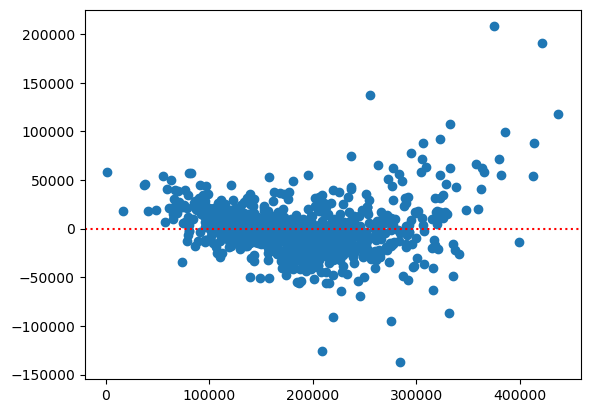

In [67]:
# Residual analysis
y_res = y_train - y_pred_train # Residuals

# Residual v/s predictions plot
plt.scatter(y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

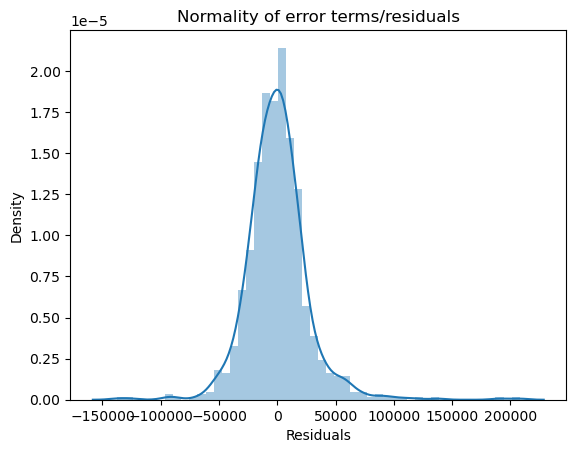

In [68]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

Since the metrics dont seem to giving a feel of a good model, lets try Lasso and Ridge Regression

## Lasso Regression

In [70]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [73]:
lasso = Lasso()

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [74]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [79]:
# Fitting Lasso model for best alpha

alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [80]:
lasso.coef_

array([ -9234.44131411,  16519.35205226,  25516.81698112, 122130.57760106,
        15828.50337491,  29460.53372359,  15996.57943151,  26230.97915106,
        44097.42961718,     -0.        ,      0.        ,  81962.5444841 ,
            0.        ,   2131.16272027, 131840.1263799 ,   2097.51824442,
           -0.        ,     -0.        ,      0.        , -33495.75292854,
        46435.15203016,   8717.67355861,      0.        ,  11911.99874789,
        38442.10853515,   1181.77735551,   5872.84004374,    434.38578759,
         8579.54991442,     -0.        ,     -0.        ,  -2378.88555982])

In [78]:
# Calculate score metrics - R2 Score, RSS, RSME

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_lasso_regression = calculate_score_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 score train :  0.8634447993629397
R2 score test  :  0.8721737505960279
RSS score train :  648684974629.0184
RSS score test  :  295411625273.4534
MSE score train :  727225307.8800656
MSE score test  :  771309726.5625416



### Ridge Regression

Let's now try predicting house prices using ridge regression.

In [81]:
from sklearn.linear_model import Ridge

In [86]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [88]:
# Fitting Ridge model for best alpha
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-10891.75537043  18804.86250815  25476.29563593 104116.9457811
  21146.85629462  20127.73135141  16258.85008275  30150.66051026
  59620.15191767   3693.82203349  20215.39079023  57389.47116477
  46558.0629863   41824.26061007  62379.48960243   5290.25831765
  -2347.14101897   1207.90598654   -298.19279858 -37741.04733521
  50615.06206234  13184.07844493   -776.79867773  16622.35722723
  36372.21387382   5574.18461769  10279.27354829   8833.84853042
  14475.93077895   -626.48813872    369.96829962 -20116.25946615]


In [89]:
# Calculate score metrics - R2 Score, RSS, RSME
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_ridge_regression = calculate_score_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 score train :  0.863697054608971
R2 score test  :  0.8707645473338744
RSS score train :  647486673962.9993
RSS score test  :  298668350929.9949
MSE score train :  725881921.483183
MSE score test  :  779812926.7101694


### Model Comparison

In [91]:
# Creating a table which contain all the metrics

score_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','RMSE (Train)','RMSE (Test)']}
score_metric = pd.DataFrame(score_table)

lr_metric = pd.Series(metric_linear_regression, name = 'Linear Regression')
rg_3_metric = pd.Series(metric_ridge_regression, name = 'Ridge Regression')
ls_100_metric = pd.Series(metric_lasso_regression, name = 'Lasso Regression')

score_metric = pd.concat([score_metric, lr_metric, rg_3_metric, ls_100_metric], axis = 1)

score_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.652043e-01,8.636971e-01,8.634448e-01
1,R2 Score (Test),8.762809e-01,8.707645e-01,8.721738e-01
2,RSS (Train),6.403267e+11,6.474867e+11,6.486850e+11
3,RSS (Test),2.859199e+11,2.986684e+11,2.954116e+11
4,RMSE (Train),2.679282e+04,2.694220e+04,2.696712e+04
5,RMSE (Test),2.732265e+04,2.792513e+04,2.777246e+04


Both Ridge and Lasso models have very close test data R2 score, but Lasso has slight edge and shows best R2 score on test data.

## Conclusion
---

### Variables significant to predict house price are:

In [92]:
significance_matrix = pd.DataFrame()

significance_matrix['Feature Name'] = X_test.columns
significance_matrix['Coefficient'] = pd.Series(lasso.coef_)
significance_matrix['Absolute Coefficient'] = pd.Series(np.abs(lasso.coef_))

significance_matrix = significance_matrix.loc[significance_matrix['Coefficient'] != 0]

significance_matrix.sort_values(by=['Absolute Coefficient'], inplace=True, ascending=False)

significance_matrix.head(10)

,Feature Name,Coefficient,Absolute Coefficient
14,GrLivArea,131840.126380,131840.126380
3,OverallQual,122130.577601,122130.577601
11,TotalBsmtSF,81962.544484,81962.544484
20,TotRmsAbvGrd,46435.152030,46435.152030
8,BsmtFinSF1,44097.429617,44097.429617
24,GarageArea,38442.108535,38442.108535
19,BedroomAbvGr,-33495.752929,33495.752929
5,YearBuilt,29460.533724,29460.533724
7,MasVnrArea,26230.979151,26230.979151
2,LotArea,25516.816981,25516.816981


- Optimal value for Ridge regression is found to be 3.0
- Optimal value for Lasso regression is found to be 100.0

### Question 1. Find effect of doubling optimal alpha values on Ridge and Lasso models

In [93]:
# Lasso Regression
# Fitting Lasso model for alpha = 200
alpha = 200.0
lasso_200 = Lasso(alpha=alpha)        
lasso_200.fit(X_train, y_train) 

Lasso(alpha=200.0)

In [94]:
# Calculate score metrics - R2 Score, RSS, RSME
y_pred_train = lasso_200.predict(X_train)
y_pred_test = lasso_200.predict(X_test)
metric_lasso_regression_aphla_200 = calculate_score_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 score train :  0.8604563933409966
R2 score test  :  0.8668747600123284
RSS score train :  662880948678.2068
RSS score test  :  307657806538.5569
MSE score train :  743140076.9935054
MSE score test  :  803284090.1789997


In [95]:
# Ridge Regression
# Fitting Ridge model for alpha = 6
alpha = 6.0
ridge_6 = Ridge(alpha=alpha)
ridge_6.fit(X_train, y_train)

Ridge(alpha=6.0)

In [97]:
# Calculate score metrics - R2 Score, RSS, RSME
y_pred_train = ridge_6.predict(X_train)
y_pred_test = ridge_6.predict(X_test)
metric_ridge_regression_aphla_6 = calculate_score_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 score train :  0.857563385948262
R2 score test  :  0.8591885075269876
RSS score train :  676623745865.0044
RSS score test  :  325421046479.8368
MSE score train :  758546800.2970902
MSE score test  :  849663306.7358663


In [98]:
# Model Comparison with new alpha values
score_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','RMSE (Train)','RMSE (Test)']}

score_metric = pd.DataFrame(score_table)

rg_3_metric = pd.Series(metric_ridge_regression, name = 'Ridge Regression (alpha 3)')
rg_6_metric = pd.Series(metric_ridge_regression_aphla_6, name = 'Ridge Regression (alpha 6)')
ls_100_metric = pd.Series(metric_lasso_regression, name = 'Lasso Regression (alpha 100)')
ls_200_metric = pd.Series(metric_lasso_regression_aphla_200, name = 'Lasso Regression (alpha 200)')

score_metric = pd.concat([score_metric, rg_3_metric, rg_6_metric, ls_100_metric, ls_200_metric], axis = 1)

score_metric

,Metric,Ridge Regression (alpha 3),Ridge Regression (alpha 6),Lasso Regression (alpha 100),Lasso Regression (alpha 200)
0,R2 Score (Train),8.636971e-01,8.575634e-01,8.634448e-01,8.604564e-01
1,R2 Score (Test),8.707645e-01,8.591885e-01,8.721738e-01,8.668748e-01
2,RSS (Train),6.474867e+11,6.766237e+11,6.486850e+11,6.628809e+11
3,RSS (Test),2.986684e+11,3.254210e+11,2.954116e+11,3.076578e+11
4,RMSE (Train),2.694220e+04,2.754173e+04,2.696712e+04,2.726060e+04
5,RMSE (Test),2.792513e+04,2.914898e+04,2.777246e+04,2.834227e+04


In [99]:
significance_matrix = pd.DataFrame()

significance_matrix['Feature Name'] = X_test.columns
significance_matrix['Coefficient'] = pd.Series(lasso_200.coef_)
significance_matrix['Absolute Coefficient'] = pd.Series(np.abs(lasso_200.coef_))

significance_matrix = significance_matrix.loc[significance_matrix['Coefficient'] != 0]

significance_matrix.sort_values(by=['Absolute Coefficient'], inplace=True, ascending=False)

significance_matrix.head(10)

,Feature Name,Coefficient,Absolute Coefficient
14,GrLivArea,131108.525210,131108.525210
3,OverallQual,123737.914049,123737.914049
11,TotalBsmtSF,79944.669685,79944.669685
8,BsmtFinSF1,46034.433007,46034.433007
24,GarageArea,38011.429207,38011.429207
20,TotRmsAbvGrd,37379.988366,37379.988366
7,MasVnrArea,24328.338279,24328.338279
2,LotArea,20563.763699,20563.763699
5,YearBuilt,20322.047447,20322.047447
6,YearRemodAdd,19211.718357,19211.718357


### Question 3. Build Lasso model without top 5 best predictor variables

In [66]:
# My top 5 predictor variables in lasso model (using optimal alpha of 100) are
# So, lets drop these 5 from the dataset, and rebuild the model
cols_to_drop = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'BsmtFinSF1', 'YearBuilt']

print('Before :', X_train.shape)
X_train.drop(cols_to_drop, axis = 1, inplace=True)
X_test.drop(cols_to_drop, axis = 1, inplace=True)
print('After :', X_train.shape)

Before : (892, 205)
After : (892, 200)


In [67]:
lasso = Lasso()
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [69]:
# Fitting Lasso model for best alpha
alpha = 100
lasso_without_best_5_features = Lasso(alpha=alpha)        
lasso_without_best_5_features.fit(X_train, y_train) 

Lasso(alpha=100)

In [70]:
# Calculate score metrics - R2 Score, RSS, RSME
y_pred_train = lasso_without_best_5_features.predict(X_train)
y_pred_test = lasso_without_best_5_features.predict(X_test)
metric_lasso_regression_without_best_5 = calculate_score_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 score train :  0.9131924365770386
R2 score test  :  0.9027837834252207
RSS score train :  412366294465.01074
RSS score test  :  224670603066.28357
MSE score train :  462294052.09081924
MSE score test  :  586607318.7109232


In [71]:
significance_matrix = pd.DataFrame()

significance_matrix['Feature Name'] = X_test.columns
significance_matrix['Coefficient'] = pd.Series(lasso_without_best_5_features.coef_)
significance_matrix['Absolute Coefficient'] = pd.Series(np.abs(lasso_without_best_5_features.coef_))

significance_matrix = significance_matrix.loc[significance_matrix['Coefficient'] != 0]

significance_matrix.sort_values(by=['Absolute Coefficient'], inplace=True, ascending=False)

significance_matrix.head(10)

,Feature Name,Coefficient,Absolute Coefficient
8,1stFlrSF,184786.684071,184786.684071
9,2ndFlrSF,98585.671229,98585.671229
23,houseAge,-42437.601326,42437.601326
3,OverallCond,36080.918671,36080.918671
61,Neighborhood_StoneBr,32435.437593,32435.437593
55,Neighborhood_NridgHt,31647.026049,31647.026049
125,ExterQual_TA,-31032.668538,31032.668538
142,BsmtExposure_Gd,26834.670833,26834.670833
16,GarageCars,26612.162758,26612.162758
124,ExterQual_Gd,-24657.439454,24657.439454


---